In [168]:
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator

In [169]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)
training_set = train_datagen.flow_from_directory('C:/CNN/leaf_flower_stem classification/training',
                                                target_size = (64,64),
                                                batch_size = 64,
                                                class_mode = 'categorical')

Found 1200 images belonging to 3 classes.


In [170]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('C:/CNN/leaf_flower_stem classification/testing',
                                           target_size = (64, 64),
                                           batch_size = 64,
                                           class_mode = 'categorical')

Found 240 images belonging to 3 classes.


In [171]:
cnn = tf.keras.models.Sequential()

In [172]:
cnn.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = 5, activation = 'relu', input_shape = [64, 64, 3], padding = 'same'))

In [173]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

In [174]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=5, activation='relu', padding = 'same'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [175]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=5, activation='relu', padding = 'same'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [176]:
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=5, activation='relu', padding = 'same'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [177]:
cnn.add(tf.keras.layers.Flatten())

In [178]:
cnn.add(tf.keras.layers.Dense(units = 1000, activation = 'relu'))

In [179]:
cnn.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))

In [180]:
cnn.add(tf.keras.layers.Dense(units = 3, activation = 'softmax'))

In [181]:
cnn.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 64, 64, 16)        1216      
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 32, 32, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 32, 32, 32)        12832     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 16, 16, 64)        51264     
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 8, 8, 64)       

In [182]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [183]:
history_model = cnn.fit(x = training_set, validation_data = test_set, epochs = 100)

Epoch 1/100
19/19 [==============================] - 8s 403ms/step - loss: 0.6377 - accuracy: 0.7108 - val_loss: 0.3258 - val_accuracy: 0.8542
Epoch 2/100
19/19 [==============================] - 8s 399ms/step - loss: 0.0613 - accuracy: 0.9850 - val_loss: 3.1707 - val_accuracy: 0.8333
Epoch 3/100
19/19 [==============================] - 8s 397ms/step - loss: 0.3480 - accuracy: 0.9308 - val_loss: 0.1550 - val_accuracy: 0.9500
Epoch 4/100
19/19 [==============================] - 8s 398ms/step - loss: 0.0630 - accuracy: 0.9858 - val_loss: 0.0356 - val_accuracy: 0.9833
Epoch 5/100
19/19 [==============================] - 8s 405ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0084 - val_accuracy: 1.0000
Epoch 6/100
19/19 [==============================] - 8s 396ms/step - loss: 4.6444e-04 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 7/100
19/19 [==============================] - 8s 414ms/step - loss: 8.5062e-05 - accuracy: 1.0000 - val_loss: 0.0050 - val_accuracy

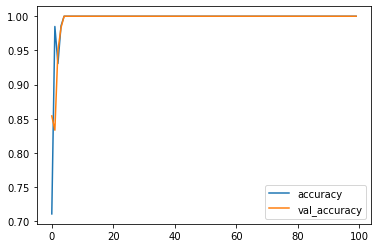

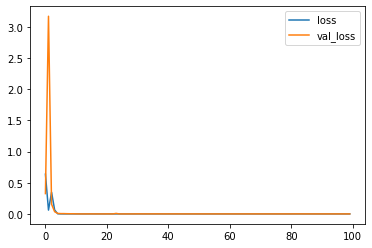

In [184]:
# Accuracy comparison
import matplotlib.pyplot as plt

plt.plot(history_model.history['accuracy'])
plt.plot(history_model.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.show()


# Loss Comparison
plt.plot(history_model.history['loss'])
plt.plot(history_model.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

In [186]:
from sklearn.metrics import classification_report, confusion_matrix

test_data_size = 40
BATCH_SIZE = 16
y_test = test_set.classes

pred = cnn.predict(test_set,test_data_size//BATCH_SIZE + 1, verbose = 1,).argmax(axis=1)

print(classification_report(y_test,pred))

total_count = 0
for i in range(len(y_test)):
    if y_test[i] != pred[i]:
        total_count += 1
print("Total number of test cases", ((len(y_test))))
print("Number of wrong predictions", total_count)

4/4 [==============================] - 1s 112ms/step
              precision    recall  f1-score   support

           0       0.28      0.28      0.28        80
           1       0.38      0.38      0.38        80
           2       0.31      0.31      0.31        80

    accuracy                           0.32       240
   macro avg       0.32      0.32      0.32       240
weighted avg       0.32      0.32      0.32       240

Total number of test cases 240
Number of wrong predictions 163
